In [1]:
!pip install numpy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Part 1
# Nam Nguyen - npn190000
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split

In [3]:
# Working with data base from UCI
dataFrame = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx")
dataFrame.to_csv ("Test.csv")
dataFrame.columns 
dataFrame.columns = ['No', 'X1_transaction_date', 'X2_house_age','X3_distance_to_the_nearest_MRT_station','X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude','Y_house_price_of_unit_area']
df = dataFrame.drop (columns = ["No"],axis =1)
train, test = train_test_split(df, test_size=0.2)
X = pd.DataFrame(np.c_[df['X1_transaction_date'], df['X2_house_age'], df['X3_distance_to_the_nearest_MRT_station'],df['X4_number_of_convenience_stores'],df['X5_latitude'],df['X6_longitude']], 
                 columns = ['X1_transaction_date', 'X2_house_age','X3_distance_to_the_nearest_MRT_station','X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude'])
Y = df['Y_house_price_of_unit_area']

# Split 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(331, 6)
(83, 6)
(331,)
(83,)


In [4]:
from ctypes import sizeof
from pandas.core.indexers import length_of_indexer
list_of_column_names = []
# Get title of the table
for row in df:
    list_of_column_names.append(row)

#Fill Na value    
for i in range(len(list_of_column_names)):
    df[list_of_column_names[i]] =  df[list_of_column_names[i]].fillna(int( df[list_of_column_names[i]].median()))

# Seperate your data list, test Data, train Data
Train_Result = pd.DataFrame(Y_train).to_numpy()
Train_Data = pd.DataFrame(X_train).to_numpy()
Test_Result = pd.DataFrame(Y_test).to_numpy()
Test_Data = pd.DataFrame(X_test).to_numpy()


In [5]:
# Predict function for a new_radio. Find Y^
def predict(new_Data, weight_list, bias):
    predict = bias
    for i in range(len(new_Data)):
      predict += new_Data[i]*weight_list[i] 
    return predict

In [6]:
# Cost function. include initial X,Y, current weight,bias. MSE
def cost_function(trainData,trainResult,weight_list,bias):
  n = len(trainData[0])
  m = len(trainData)
  sum_error = 0
  pre = 0.0

  for i in range(m):
    pre = bias
    for j in range(n):
      pre = pre + weight_list[j]*trainData[i][j]
    sum_error += (trainResult[i] - (pre))**2
  return sum_error/m

# RSS
def RSS(trainData,trainResult,weight_list,bias):
  m = len(trainData)
  return cost_function(trainData,trainResult,weight_list,bias)*m


In [7]:
# TSS
def TSS(trainData,trainResult,weight_list,bias):
  n = len(trainData[0])
  m = len(trainData)
  sum_error = 0
  pre = 0.0

  pre = np.median(np.array(trainData)) 
  for i in range(m):
    sum_error += (trainResult[i] - (pre))**2
  
  return sum_error/m
#R^2
def R2(trainData,trainResult,weight_list,bias):
  temp1 = RSS(trainData,trainResult,weight_list,bias)
  temp2 = TSS(trainData,trainResult,weight_list,bias)

  return 1 - (temp1/temp2)

In [8]:
#Create new weight and new bias use Gradient Descent
# Use learning rate
def update(trainData,testData,weight_list,bias,learning_rate):
  n = len(trainData[0])
  m = len(trainData)
  pre = 0
  weight_temp = []
  bias_temp = 0.0
  
  for j in range(n):
    weight_temp.append(0.0)
 
  for i in range(m):
    pre = bias
    for j in range(n):
        pre += weight_list[j]*trainData[i][j]
    for j in range(n):
          weight_temp[j] += -1*trainData[i][j]*(testData[i]-pre)
     
    bias_temp += -1*(testData[i]-pre) 

  for j in range(n):
    weight_list[j] = weight_list[j]- ((weight_temp[j]*2)/m)*learning_rate
  e =  ((bias_temp*2)/m)*learning_rate
  bias =  bias - e 

  return weight_list,float(bias)

In [9]:
# Training function
def train(trainData,testData,weight_list,bias,learning_rate,iter):
  cost_his = []
  r2_his = []
  r2 = []
  for i in range(iter):
      weight_list,bias = update(trainData,testData,weight_list,bias,learning_rate) # update weight , bias
      
      cost = cost_function(trainData,testData,weight_list,bias) # count MSE
      r2 = R2(trainData,testData,weight_list,bias) # R^2
      cost_his.append(cost)
      r2_his.append(r2)
  return bias,weight_list,cost_his,r2_his

In [10]:
# Set a number for_loop to repeat the training
n = 400

# Create initial weigh list
weight_list = []
for j in range(len(Train_Data[0])):
    weight_list.append(0.1)

# Testting data
bias,weight_list,cost,r_2 = train(Train_Data,Train_Result,weight_list,0.1,0.00000001,n)



Y_interception:  0.09995763576389985
Weight list: 
 [array([0.01471679]), array([0.0988982]), array([-0.00711181]), array([0.09995953]), array([0.09894277]), array([0.09485191])]
MSE list 
 [array([80759.62640075]), array([63474.94377124]), array([49930.86326125]), array([39316.26204796]), array([30995.97490326]), array([24472.62040296]), array([19356.70903375]), array([15343.23641362]), array([12193.35465988]), array([9720.02018496]), array([7776.75522177]), array([6248.84754595]), array([5046.45942098]), array([4099.23155508]), array([3352.05772324]), array([2761.77607549]), array([2294.57825458]), array([1923.98059258]), array([1629.23544266]), array([1394.087158]), array([1205.79794639]), array([1054.38505098]), array([932.0234099]), array([832.57789444]), array([751.23701397]), array([684.22607471]), array([628.58255533]), array([581.98020169]), array([542.59127174]), array([508.97865428]), array([480.01138079]), array([454.79845585]), array([432.63703226]), array([412.97181917]),

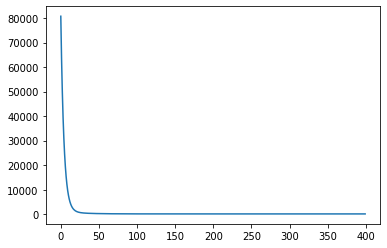


Display a diagram about R**2



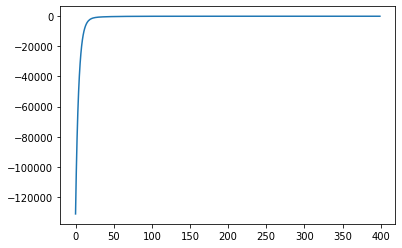

In [11]:
# Display result 

print("Y_interception: ",bias)
print("Weight list: \n", weight_list)
print("MSE list \n",cost)
print("R power 2 list \n",r_2)

print("\nDisplay a diagram about MSE (cost)\n")
rep_num = [i for i in range(n)]
plt.plot(rep_num,cost)
plt.show()
print("\nDisplay a diagram about R**2\n")
rep_num = [i for i in range(n)]
plt.plot(rep_num,r_2)
plt.show()

In [12]:
# Testing with data
Y_predict = [] 
length_of_Test_List = len(Test_Data)

for i in range(length_of_Test_List):
  Y_predict.append(predict(Test_Data[i],weight_list,bias))
  



Display a diagram about from your code predict with black line, and real value with blue line



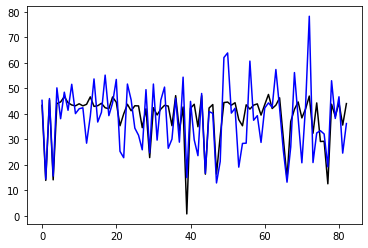

In [13]:
# Other Diagram

print("\nDisplay a diagram about from your code predict with black line, and real value with blue line\n")
rep_num = [i for i in range(length_of_Test_List)]
plt.plot(rep_num,np.array(Y_predict),label = "line Predict", color = 'black')
plt.plot(rep_num,np.array(Test_Result),label = "line Real Value", color = 'blue')
plt.show()
# 


[31.559375682518294, 35.74057124770843, 31.793305396617143, 41.6893237744971, 45.60782779333749, 54.82568803438335, 47.915405426441794, 39.634592184231224, 43.5340317081409, 31.761767863179557, 32.082555873359524, 21.95679021095384, 39.28439743331546, 34.47597506321654, 43.923761234491394, 16.18214412213274, 45.83040227948368, 40.568705959618455, 39.83431967447541, 40.99159393924492, 41.97474993304968, 39.64899633206369, 27.795905779512395, 43.45886242575398, 8.886013866824214, 44.990804400300476, 14.833925303422802, 45.124021921132226, 42.59777388095608, 32.22368774866845, 42.08514406330869, 48.22312700298062, 37.33645156741113, 47.83660025806603, 39.26437403007003, 36.583381745413135, 30.64303287624898, 36.83661156373455, 37.50250410600711, 30.857359975696454, 44.25062259570586, 50.47777892117847, 45.171632086674435, 54.44364100484199, 50.21948128335134, 16.031913747088765, 44.40143034452194, 38.52678731988999, 55.96517561265864, 51.322773351444994, 28.146989693022988, 33.26128825570

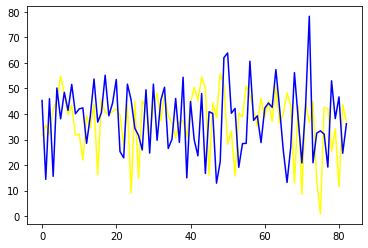


Display a diagram about from Sklearn code predict with yellow line, and your code predict value with black line



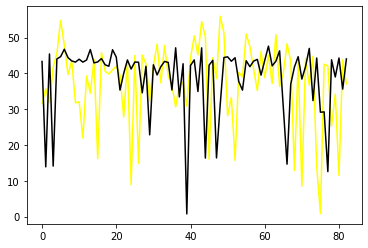

In [15]:
# Part 2:
# Using Sklearn library
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(Test_Data,Test_Result)
reg.predict([Train_Data[1]])

Y_sklearn = []
for i in range(length_of_Test_List):
  temp =  reg.predict([Train_Data[i]])
  Y_sklearn.append(temp[0][0])

print(Y_sklearn)

print("\nDisplay a diagram about from Sklearn code predict with yellow line, and real value with blue line\n")
rep_num = [i for i in range(length_of_Test_List)]
plt.plot(rep_num,np.array(Y_sklearn),label = "line Predict from Sklearn", color = 'yellow')
plt.plot(rep_num,np.array(Test_Result),label = "line Real Value", color = 'blue')
plt.show()
print("\nDisplay a diagram about from Sklearn code predict with yellow line, and your code predict value with black line\n")
rep_num = [i for i in range(length_of_Test_List)]
plt.plot(rep_num,np.array(Y_sklearn),label = "line Predict from Sklearn", color = 'yellow')
plt.plot(rep_num,np.array(Y_predict), label = "line Predict", color = 'black')
plt.show()